In [3]:
# Projeto de Inteligência Artificial
# Tema: Predição de Mortes por Tuberculose (2000–2023)
# Autor: Tales Hernandes
# Dataset: Gapminder (WHO)
# Histórico:
# - 22/09/2025: Criação do notebook com EDA e preparação de dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
# ============================
# 1) Carregamento do Dataset
# ============================
file_path = "all_forms_of_tb_deaths_per_100000_estimated.csv"
df = pd.read_csv(file_path)

print("Formato do dataset:", df.shape)
print("\nColunas disponíveis:", df.columns.tolist())
df.head()

Formato do dataset: (214, 25)

Colunas disponíveis: ['country', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,0.64,0.68,0.73,0.76,0.80,0.83,0.86,0.88,0.90,...,0.18,0.83,1.30,0.72,0.45,0.18,0.09,0.53,0.44,0.29
1,Afghanistan,68.00,63.00,57.00,58.00,52.00,47.00,43.00,39.00,41.00,...,43.00,40.00,34.00,30.00,29.00,26.00,27.00,26.00,25.00,24.00
2,Angola,87.00,91.00,78.00,73.00,86.00,95.00,74.00,91.00,99.00,...,97.00,87.00,88.00,96.00,72.00,62.00,62.00,61.00,65.00,61.00
3,Anguilla,9.60,9.60,9.60,9.50,9.50,9.20,9.40,9.30,8.90,...,12.00,9.20,9.20,8.60,9.30,8.50,8.30,9.30,6.50,8.20
4,Albania,0.74,0.66,0.64,0.62,0.86,0.41,0.38,0.56,0.57,...,0.37,0.37,0.37,0.38,0.37,0.35,0.36,0.37,0.37,0.34


In [5]:
# ============================
# 2) Verificação de valores ausentes
# ============================
missing_values = df.isna().sum()
print("\nValores ausentes por coluna:")
print(missing_values)


Valores ausentes por coluna:
country    0
2000       6
2001       6
2002       5
2003       5
2004       5
2005       3
2006       3
2007       3
2008       3
2009       3
2010       1
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
dtype: int64


In [6]:
# ============================
# 3) Estatísticas descritivas
# ============================
stats = df.drop(columns=["country"]).describe().T
print("\nEstatísticas descritivas (2000-2004):")
print(stats.head())


Estatísticas descritivas (2000-2004):
      count       mean        std  min    25%   50%    75%    max
2000  208.0  35.930625  64.591963  0.0  1.375  6.20  32.75  317.0
2001  208.0  35.821346  67.925582  0.0  1.275  5.95  33.50  409.0
2002  209.0  34.958278  66.142903  0.0  1.300  6.90  34.00  376.0
2003  209.0  34.514641  67.088074  0.0  1.400  6.30  32.00  398.0
2004  209.0  33.679426  68.628857  0.0  1.200  5.80  31.00  430.0


In [7]:
# ============================
# 4) Transformação para formato longo (para análises temporais)
# ============================
df_long = df.melt(id_vars=["country"], var_name="year", value_name="deaths_per_100k")
df_long["year"] = df_long["year"].astype(int)

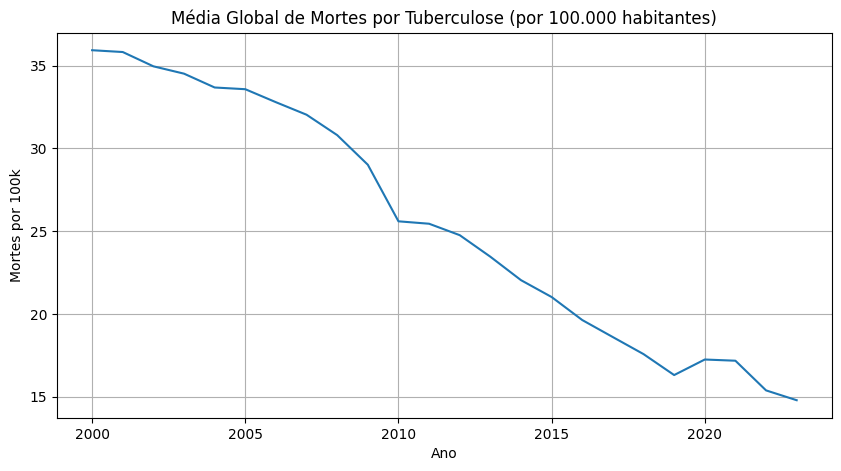

In [8]:
# ============================
# 5) Tendência global (média por ano)
# ============================
global_trend = df_long.groupby("year")["deaths_per_100k"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(data=global_trend)
plt.title("Média Global de Mortes por Tuberculose (por 100.000 habitantes)")
plt.ylabel("Mortes por 100k")
plt.xlabel("Ano")
plt.grid(True)
plt.show()

/tmp/ipython-input-3690502704.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_2023, x="deaths_per_100k", y="country", palette="Reds_r")


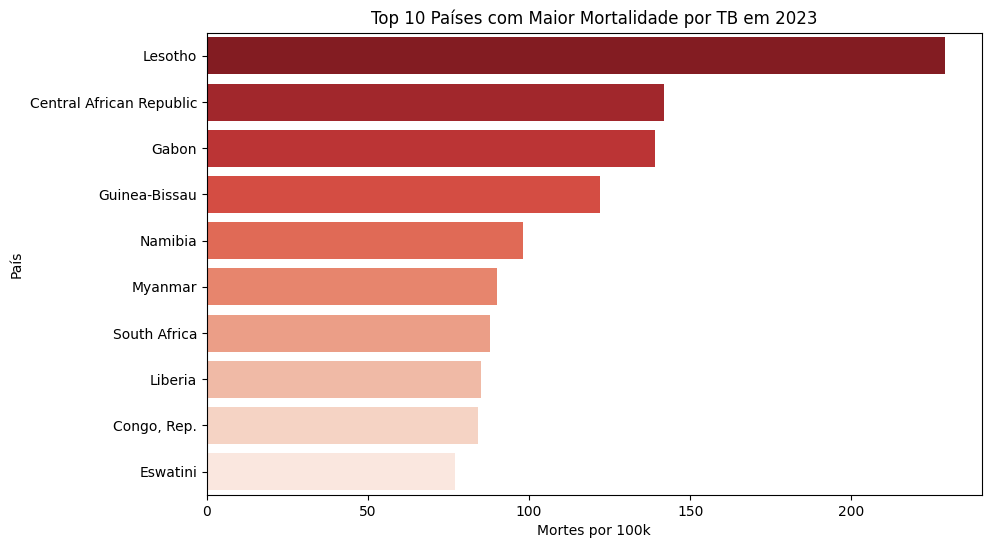


Top 10 países em 2023:
                       country  year  deaths_per_100k
5032                   Lesotho  2023            229.0
4954  Central African Republic  2023            142.0
4988                     Gabon  2023            139.0
4994             Guinea-Bissau  2023            122.0
5057                   Namibia  2023             98.0
5047                   Myanmar  2023             90.0
5133              South Africa  2023             88.0
5028                   Liberia  2023             85.0
4962               Congo, Rep.  2023             84.0
5102                  Eswatini  2023             77.0


In [9]:
# ============================
# 6) Top 10 países em 2023
# ============================
top_2023 = df_long[df_long["year"] == 2023].sort_values("deaths_per_100k", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_2023, x="deaths_per_100k", y="country", palette="Reds_r")
plt.title("Top 10 Países com Maior Mortalidade por TB em 2023")
plt.xlabel("Mortes por 100k")
plt.ylabel("País")
plt.show()

print("\nTop 10 países em 2023:")
print(top_2023)

In [11]:
# ============================
# 7) Preparação dos Dados
# ============================

# Pivotar para formato adequado (anos como features)
df_pivot = df.set_index("country")

# Tratamento de valores ausentes: imputação pela média
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df_pivot), columns=df_pivot.columns, index=df_pivot.index)

# Features: anos 2000-2022
X = df_imputed.drop(columns=["2023"])
y = df_imputed["2023"]

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nConjuntos preparados:")
print("Treino:", X_train.shape, "Teste:", X_test.shape)


Conjuntos preparados:
Treino: (171, 23) Teste: (43, 23)
